In [31]:
import os
import glob
import textgrid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline
'''
https://zhuanlan.zhihu.com/p/60128515
'''

'\nhttps://zhuanlan.zhihu.com/p/60128515\n'

In [32]:
currentPath = os.getcwd()
resultPath = currentPath + '/../final_testset_result'
set_name = 'Testing'
# resultPath = currentPath + '/train-result'
# set_name = 'Training'

In [33]:
resultList = glob.glob(resultPath + '/*[!.txt]')
errList = []
abserrList = []

In [34]:
resultList

['/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/7',
 '/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/6',
 '/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/1',
 '/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/10',
 '/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/8',
 '/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/3',
 '/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/2',
 '/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/5']

In [ ]:
def parse_Interval(IntervalObject):
    start_time = ""
    end_time = ""
    P_name = ""

    ind = 0
    if len(IntervalObject.mark) == 0: 
        return None, ()
    
    str_interval = str(IntervalObject)
    for ele in str_interval:
        if ele == "(":
            ind = 1
        if ele == " " and ind == 1:
            ind = 2
        if ele == "," and ind == 2:
            ind = 3
        if ele == " " and ind == 3:
            ind = 4

        if ind == 1:
            if ele != "(" and ele != ",":
                start_time = start_time + ele
        if ind == 2:
            end_time = end_time + ele
        if ind == 4:
            if ele != " " and ele != ")":
                P_name = P_name + ele

    st = float(start_time)
    et = float(end_time)
    pn = P_name

    return pn, (st, et)

def parse_textgrid(filename, details=False):
    tg = textgrid.TextGrid.fromFile(filename)
    list_words = tg.getList("words")
    words_list = list_words[0]
    s, e = float("inf"), float("-inf")
    d = {}
    
    for ele in words_list:
        
        pn, time = parse_Interval(ele)
        if pn is not None:
            d[pn] = time
            s = min(s, time[0])
            e = max(e, time[1])
        
    if details:
        return {'start_time': s, 'end_time': e, 'dictionary': d}
    else:
        return {'start_time': s, 'end_time': e}

In [35]:
for result in resultList:
    for i in glob.glob(result + '/*'):
        print(i)
        name, true_start, true_end = i.replace(result, '').split('.')[0].split('-')
        true_period = float(true_end)/100 - float(true_start)/100
        predDict = parse_textgrid(i)
        pred_period = predDict['end_time'] - predDict['start_time']

        errList.append(true_period - pred_period)
        abserrList.append(abs(true_period - pred_period))

/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/7/ElizabethGilbert_2009-0084143-0085316.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/7/ElizabethGilbert_2009-0086595-0088499.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/7/ElizabethGilbert_2009-0064630-0066904.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/7/ElizabethGilbert_2009-0060274-0061061.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/7/ElizabethGilbert_2009-0078352-0079779.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/7/ElizabethGilbert_2009-0088499-0090524.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/7/ElizabethGilbert_2009-0114332-0114442.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/7/ElizabethGilbert_2009-0082189-0083664.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recog

/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/1/AlGore_2009-0039615-0040079.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/10/BillGates_2010-0118832-0120110.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/10/BillGates_2010-0130155-0131091.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/10/BillGates_2010-0093270-0094056.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/10/BillGates_2010-0133186-0134086.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/10/BillGates_2010-0113940-0114550.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/10/BillGates_2010-0160746-0161453.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/10/BillGates_2010-0155499-0155689.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/10/BillGates_2010-015

/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/8/WadeDavis_2003-0120116-0120243.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/8/WadeDavis_2003-0114978-0115664.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/8/WadeDavis_2003-0105433-0106921.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/8/WadeDavis_2003-0092631-0094068.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/8/WadeDavis_2003-0084077-0085205.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/8/WadeDavis_2003-0110559-0111419.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/8/WadeDavis_2003-0115664-0116582.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/8/WadeDavis_2003-0101544-0103866.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/8/WadeDavis_2003-0099166-

/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/2/BarrySchwartz_2005G-0085502-0085781.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/2/BarrySchwartz_2005G-0113151-0114308.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/2/BarrySchwartz_2005G-0102631-0103651.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/2/BarrySchwartz_2005G-0112295-0113151.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/2/BarrySchwartz_2005G-0099870-0100615.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/2/BarrySchwartz_2005G-0091167-0092769.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/2/BarrySchwartz_2005G-0092769-0094116.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_testset_result/2/BarrySchwartz_2005G-0108308-0109445.TextGrid
/home/jovyan/work/COMSE6998-Speech-Recognition/../final_

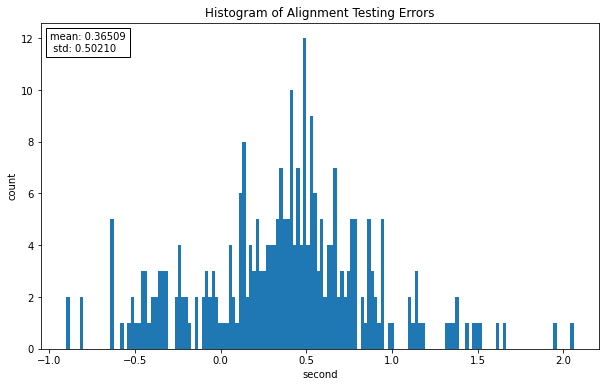

In [38]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(errList, bins=150)
ax.set_title('Histogram of Alignment %s Errors' % set_name)
anchored_text = AnchoredText('mean: %.5f\n std: %.5f' % (np.mean(errList), np.std(errList)), loc=2)
ax.add_artist(anchored_text)
ax.set_xlabel('second')
ax.set_ylabel('count')
fig.savefig(os.getcwd() + '/hist-%s-error.png' % set_name.lower())

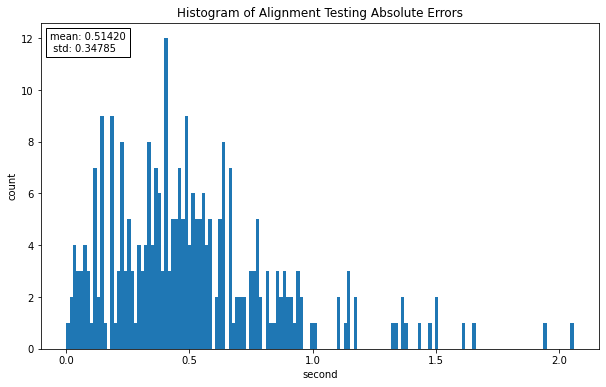

In [39]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(abserrList, bins=150)
ax.set_title('Histogram of Alignment %s Absolute Errors' % set_name)
anchored_text = AnchoredText('mean: %.5f\n std: %.5f' % (np.mean(abserrList), np.std(abserrList)), loc=2)
ax.add_artist(anchored_text)
ax.set_xlabel('second')
ax.set_ylabel('count')
fig.savefig(os.getcwd() + '/hist-%s-absolute-error.png' % set_name.lower())